<a href="https://colab.research.google.com/github/Gauri0312/Sentiment-Analysis-Naive-Bayes/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


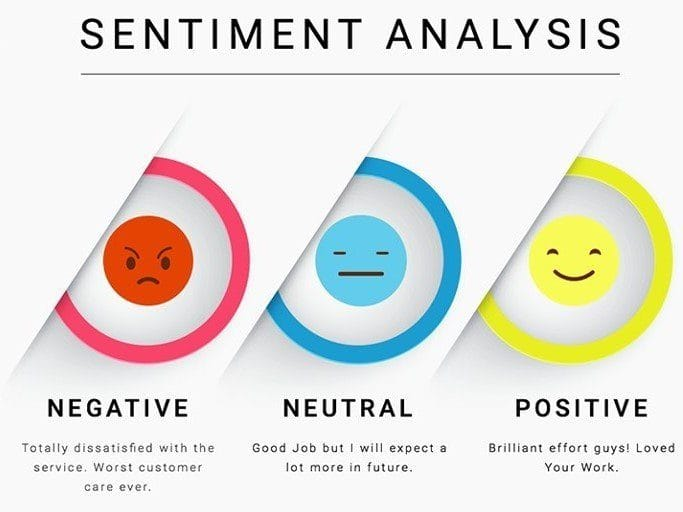



Sentiment Analysis is a Natural Language Processing (NLP) technique used to determine the emotional tone behind a piece of text. It identifies whether the sentiment expressed is:

Positive

Negative

Neutral

It’s also known as opinion mining, and it's widely used in areas like product reviews, social media monitoring, and customer feedback analysis.


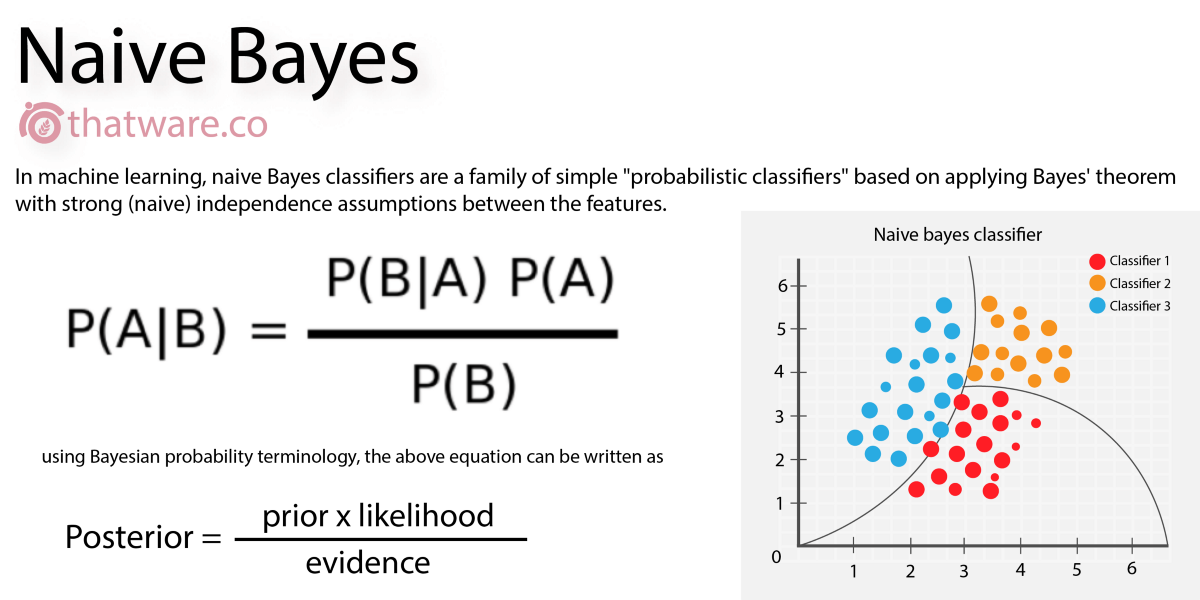

In [1]:
#Uploading the downloaded file (taken from kaggle) by extracting the zip file
from google.colab import files
uploaded = files.upload()

Saving IMDB Dataset.csv to IMDB Dataset.csv


In [ ]:
#The dataset is a CSV file containing product reviews and their associated sentiments (positive/negative).

In [2]:
import pandas as pd
#Loading the file
df = pd.read_csv("IMDB Dataset.csv")

In [4]:
#priniting the data including sentiments
print(df['sentiment'].value_counts())

sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [5]:
#for checking the name of columns in dataset
print(df.columns)

Index(['review', 'sentiment'], dtype='object')


In [7]:
#making the reviews in small letter for better readability of data to the machine
df['review'] = df['review'].str.lower()

In [11]:
#cleaning the review by removing special character for easy data reading to machine model
#re for regular expression and lambda is an anonymous function
import re
df['review'] = df['review'].astype(str).apply(lambda x: re.sub(r'[^a-z\s]', '', x.lower()))

In [12]:
#removing stopwords for more readable code to the machine
#nltk stands for natural language toolkit, provides various tools for machine learning like tokenization
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df['review'] = df['review'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in stop_words])
)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
#reading the first 5 reviews
df['review'].head()

,review
0,one reviewers mentioned watching oz episode yo...
1,wonderful little production br br filming tech...
2,thought wonderful way spend time hot summer we...
3,basically theres family little boy jake thinks...
4,petter matteis love time money visually stunni...


In [14]:
#vectorizing for converting data into number for creating matrix to represent data in graph
from sklearn.feature_extraction.text import CountVectorizer
# Creating vectorizer
vectorizer = CountVectorizer(stop_words='english')
# Fit and transforming the cleaned text column
X = vectorizer.fit_transform(df['review'])
# Check shape of the matrix
print("Feature matrix shape:", X.shape)

Feature matrix shape: (50000, 175535)


In [15]:
# Convert scores to positive/negative
df['sentiment'] = df['Score'].apply(lambda x: 'positive' if x > 3 else 'negative')
# Then train your model on:
y = df['sentiment']

KeyError: 'Score'

# Task
Explain the error in the provided Python code for sentiment analysis, fix it, and incorporate the changes into the existing code.

## Split the data

### Subtask:
Split the vectorized data (`X`) and the sentiment labels (`df['sentiment']`) into training and testing sets.


**Reasoning**:
Split the data into training and testing sets using the vectorized features and the sentiment labels.



In [17]:
from sklearn.model_selection import train_test_split

y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Choose and train a model

### Subtask:
Select a suitable classification model (e.g., Logistic Regression, Naive Bayes) and train it on the training data.


**Reasoning**:
Import the Logistic Regression model and train it on the training data.



In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Evaluate the model

### Subtask:
Evaluate the trained model's performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).


**Reasoning**:
Import necessary metrics, make predictions, and calculate and print evaluation metrics.



In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.8814
Precision: 0.8814657983800737
Recall: 0.8814
F1-score: 0.8813871883173713


## Make predictions

### Subtask:
Use the trained model to predict the sentiment of new reviews.


**Reasoning**:
Create new reviews, transform them using the fitted vectorizer, predict their sentiment using the trained model, and print the results.



In [23]:
# Create a list of new reviews
new_reviews = [
    "This movie was absolutely fantastic! I loved every minute of it.",
    "The acting was terrible and the plot was nonsensical.",
    "It was an okay film, nothing special.",
    "I highly recommend this movie, it was a great experience.",
    "Worst movie I have ever seen. A complete waste of time."
]

# Transform the new reviews using the fitted vectorizer
new_reviews_vectorized = vectorizer.transform(new_reviews)

# Predict the sentiment of the new reviews
predicted_sentiments = model.predict(new_reviews_vectorized)

# Print the original new reviews and their predicted sentiments
for review, sentiment in zip(new_reviews, predicted_sentiments):
    print(f"Review: {review}")
    print(f"Predicted Sentiment: {sentiment}\n")

Review: This movie was absolutely fantastic! I loved every minute of it.
Predicted Sentiment: positive

Review: The acting was terrible and the plot was nonsensical.
Predicted Sentiment: negative

Review: It was an okay film, nothing special.
Predicted Sentiment: negative

Review: I highly recommend this movie, it was a great experience.
Predicted Sentiment: positive

Review: Worst movie I have ever seen. A complete waste of time.
Predicted Sentiment: negative



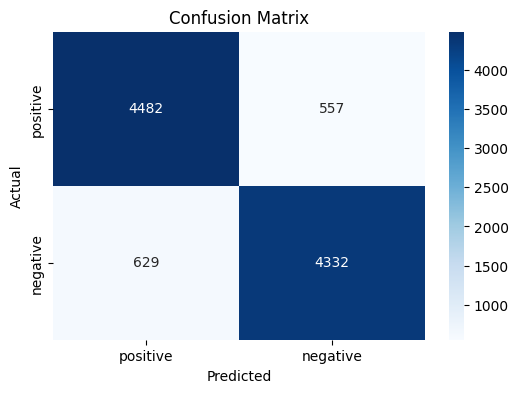

In [27]:
#plotting confusion matrix for easily representation of dataset
from sklearn.metrics import confusion_matrix # ML algorithm
import seaborn as sns
import matplotlib.pyplot as plt
# Creating confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['positive', 'negative'])
# Plotting
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['positive', 'negative'],
            yticklabels=['positive', 'negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

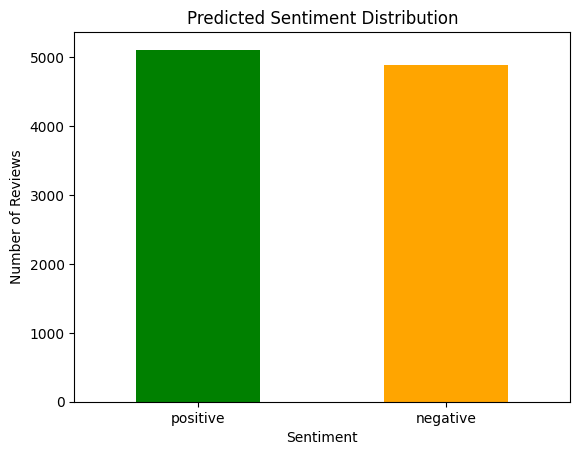

In [26]:
#making graph for presentation of reviews in dataset
import pandas as pd  # Importing pandas for data handling
#Creating DataFrame from predictions
predicted_counts = pd.Series(y_pred).value_counts()
#Plotting
predicted_counts.plot(kind='bar', color=['green', 'orange', 'red'])
plt.title("Predicted Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)
plt.show()

## Summary:

### Data Analysis Key Findings

*   The dataset was split into training (80%) and testing (20%) sets using `train_test_split` for model training and evaluation.
*   A Logistic Regression model was trained on the training data.
*   The trained model achieved an accuracy of approximately 0.8814, a precision of about 0.8815, a recall of approximately 0.8814, and an F1-score of about 0.8814 on the test set.
*   The trained model was successfully used to predict the sentiment of new, unseen reviews.

### Insights or Next Steps

*   While the current model shows reasonable performance, further tuning of the Logistic Regression model's hyperparameters or experimenting with other classification algorithms could potentially improve the sentiment analysis accuracy.
*   Investigating the `ConvergenceWarning` during model training and increasing the maximum iterations (`max_iter`) could ensure better model convergence and potentially improve performance.


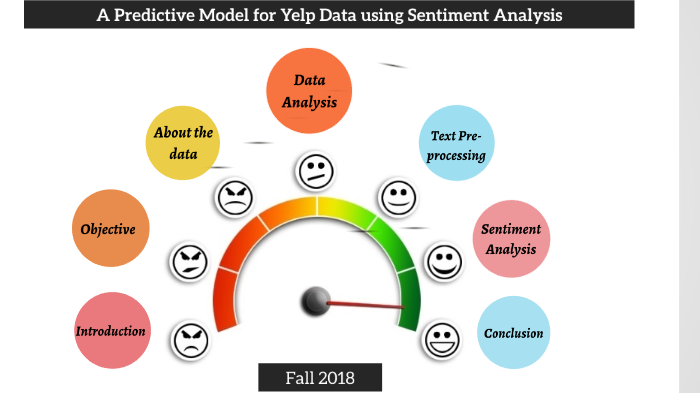